# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
import re
import string
import nltk
from nltk.corpus import stopwords
import gensim
import pyLDAvis.gensim_models
from gensim.models import CoherenceModel
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
import time
 #pip install wordcloud
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
import pickle
warnings.filterwarnings('ignore')

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



# Importing dataset

In [3]:
columns  = ["sentiment", "id", "date", "flag", "user", "text"]
df = pd.read_csv('dataset.csv',names=columns,encoding='cp1252')

In [4]:
df

,sentiment,id,date,flag,user,text
0,0.0,1.467810e+09,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,_TheSpecialOne_
1,0.0,1.467811e+09,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0.0,1.467811e+09,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0.0,1.467811e+09,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0.0,1.467811e+09,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1048567,4.0,1.960186e+09,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum
1048568,4.0,1.960186e+09,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...
1048569,4.0,1.960186e+09,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Termi...
1048570,4.0,1.960186e+09,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?


In [5]:
df = df.dropna()
# df.isnull().sum()

In [6]:
df.shape

(1048570, 6)

In [7]:
# df = df.iloc[0:35000,:]

In [8]:
df.head()

,sentiment,id,date,flag,user,text
0,0.0,1.467810e+09,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,_TheSpecialOne_
1,0.0,1.467811e+09,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0.0,1.467811e+09,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0.0,1.467811e+09,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0.0,1.467811e+09,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [9]:
df.tail()



,sentiment,id,date,flag,user,text
1048567,4.0,1.960186e+09,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum
1048568,4.0,1.960186e+09,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...
1048569,4.0,1.960186e+09,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Termi...
1048570,4.0,1.960186e+09,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?
1048571,4.0,1.960187e+09,Fri May 29 07:33:45 PDT 2009,NO_QUERY,sugababez,cant wait til her date this weekend


In [10]:
df_1 = df[['sentiment','text']]

In [11]:
df_1

,sentiment,text
0,0.0,_TheSpecialOne_
1,0.0,is upset that he can't update his Facebook by ...
2,0.0,@Kenichan I dived many times for the ball. Man...
3,0.0,my whole body feels itchy and like its on fire
4,0.0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1048567,4.0,My GrandMa is making Dinenr with my Mum
1048568,4.0,Mid-morning snack time... A bowl of cheese noo...
1048569,4.0,@ShaDeLa same here say it like from the Termi...
1048570,4.0,@DestinyHope92 im great thaanks wbuu?


In [12]:
#4 in the sentiment column for positive tweets and 0 for negatives in the data set.
#Let's change 4 to 1 and make the sentiment category of positive tweets "1".

In [13]:
df['sentiment'] = df['sentiment'].replace(4,1) 

In [14]:
df['sentiment']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1048567    1.0
1048568    1.0
1048569    1.0
1048570    1.0
1048571    1.0
Name: sentiment, Length: 1048570, dtype: float64

In [15]:
df.tail()

,sentiment,id,date,flag,user,text
1048567,1.0,1.960186e+09,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum
1048568,1.0,1.960186e+09,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...
1048569,1.0,1.960186e+09,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Termi...
1048570,1.0,1.960186e+09,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?
1048571,1.0,1.960187e+09,Fri May 29 07:33:45 PDT 2009,NO_QUERY,sugababez,cant wait til her date this weekend


In [16]:
df['sentiment'].value_counts()

0.0    799994
1.0    248576
Name: sentiment, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048570 entries, 0 to 1048571
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   sentiment  1048570 non-null  float64
 1   id         1048570 non-null  float64
 2   date       1048570 non-null  object 
 3   flag       1048570 non-null  object 
 4   user       1048570 non-null  object 
 5   text       1048570 non-null  object 
dtypes: float64(2), object(4)
memory usage: 56.0+ MB


In [18]:
df['text'] = df['text'].astype(str)


In [19]:
df['text']

0                                            _TheSpecialOne_
1          is upset that he can't update his Facebook by ...
2          @Kenichan I dived many times for the ball. Man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1048567             My GrandMa is making Dinenr with my Mum 
1048568    Mid-morning snack time... A bowl of cheese noo...
1048569    @ShaDeLa same here  say it like from the Termi...
1048570               @DestinyHope92 im great thaanks  wbuu?
1048571                 cant wait til her date this weekend 
Name: text, Length: 1048570, dtype: object

In [20]:
text, sentiment = list(df['text']), list(df['sentiment'])

In [21]:
text

['_TheSpecialOne_',
 "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
 '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
 'my whole body feels itchy and like its on fire ',
 "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. ",
 '@Kwesidei not the whole crew ',
 'Need a hug ',
 "@LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?",
 "@Tatiana_K nope they didn't have it ",
 '@twittera que me muera ? ',
 "spring break in plain city... it's snowing ",
 'I just re-pierced my ears ',
 "@caregiving I couldn't bear to watch it.  And I thought the UA loss was embarrassing . . . . .",
 '@octolinz16 It it counts, idk why I did either. you never talk to me anymore ',
 "@smarrison i would've been the first, but i didn't have a gun.    not really though, zac snyder's just a doucheclow

# Text Preprocessing

In [22]:
def clean_dataset(textdata):
    processedText=[]
    wordLemm = WordNetLemmatizer()
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-z0-9#]"
    stopwords_set = stopwords.words('english')
    
    for tweet in textdata:
        tweet = tweet.lower()
        tweet = re.sub(urlPattern,' URL',tweet)
        tweet = re.sub(userPattern,' USER', tweet)   
        tweet = re.sub(alphaPattern, " ", tweet)
        tweet = " ".join([i for i in tweet.split() if i not in stopwords_set])
  
   
        tweetwords = ''
        for word in tweet.split():
            if len(word)>1:
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
        processedText.append(tweetwords)
    
    
    return processedText

In [23]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
t = time.time()
processedtext = clean_dataset(text)
print(f'Time Taken: {round(time.time()-t)} seconds')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DIVYA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DIVYA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Time Taken: 53 seconds


In [24]:
processedtext

['thespecialone ',
 'upset update facebook texting might cry result school today also blah ',
 'dived many time ball managed save 50 rest go bound ',
 'whole body feel itchy like fire ',
 'behaving mad see ',
 'whole crew ',
 'need hug ',
 'hey long time see yes rain bit bit lol fine thanks ',
 'nope ',
 'que muera ',
 'spring break plain city snowing ',
 'pierced ear ',
 'bear watch thought ua loss embarrassing ',
 'count idk either never talk anymore ',
 'would first gun really though zac snyder doucheclown ',
 'wish got watch miss premiere ',
 'hollis death scene hurt severely watch film wry director cut ',
 'file tax ',
 'ahh ive always wanted see rent love soundtrack ',
 'oh dear drinking forgotten table drink ',
 'day get much done ',
 'one friend called asked meet mid valley today time sigh ',
 'baked cake ated ',
 'week going hoped ',
 'blagh class tomorrow ',
 'hate call wake people ',
 'going cry sleep watching marley ',
 'im sad miss lilly ',
 'ooooh lol leslie ok leslie get

In [25]:
processedtext[1:5]

['upset update facebook texting might cry result school today also blah ',
 'dived many time ball managed save 50 rest go bound ',
 'whole body feel itchy like fire ',
 'behaving mad see ']

# Data Analysis

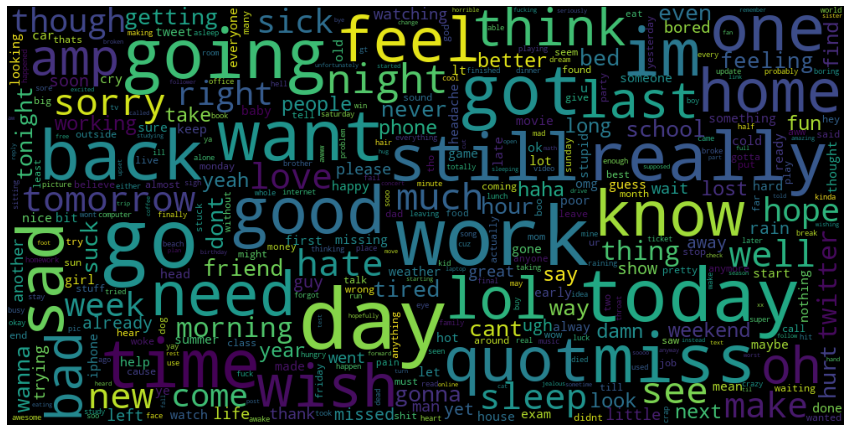

In [26]:

data_neg = " ".join(processedtext[:800000])
plt.figure(figsize = (15,15))
wc = WordCloud(max_words=400, width=1000, height=500, max_font_size=100, collocations=False).generate(data_neg)
plt.imshow(wc)
plt.axis('off')
plt.show()

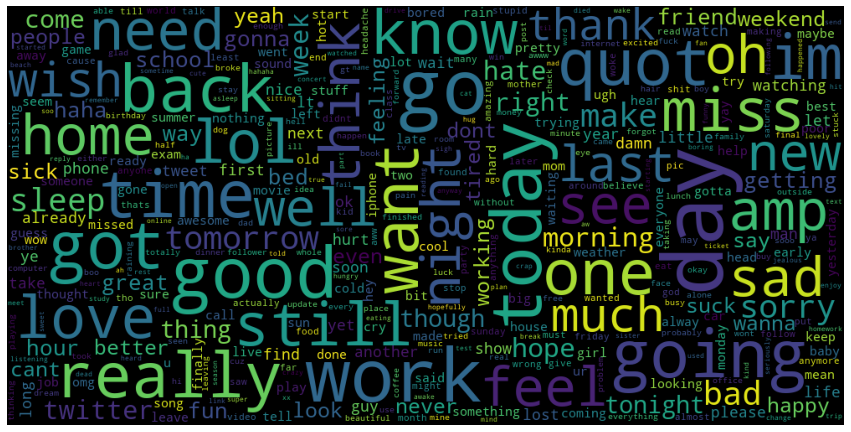

In [27]:
data_pos = " ".join(processedtext[2500:])
wc = WordCloud(max_words=400, width=1000, height=500, max_font_size=100, collocations=False).generate(data_pos)
plt.figure(figsize = (15,15))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [28]:
df['clean_tweet']= processedtext
def hashtag_extract(tweets):
    hashtags = []
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags   

In [29]:
df

,sentiment,id,date,flag,user,text,clean_tweet
0,0.0,1.467810e+09,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,_TheSpecialOne_,thespecialone
1,0.0,1.467811e+09,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
2,0.0,1.467811e+09,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dived many time ball managed save 50 rest go b...
3,0.0,1.467811e+09,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,0.0,1.467811e+09,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",behaving mad see
...,...,...,...,...,...,...,...
1048567,1.0,1.960186e+09,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum,grandma making dinenr mum
1048568,1.0,1.960186e+09,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...,mid morning snack time bowl cheese noodle yum
1048569,1.0,1.960186e+09,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Termi...,say like terminiator movie come like word
1048570,1.0,1.960186e+09,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?,im great thaanks wbuu


In [30]:
ht_positive = hashtag_extract(df['clean_tweet'][df['sentiment']==1])

ht_negative = hashtag_extract(df['clean_tweet'][df['sentiment']==0])

In [31]:
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [32]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,devunity,1
1,alexa,1
2,japan,3
3,skype,2
4,expletives,1


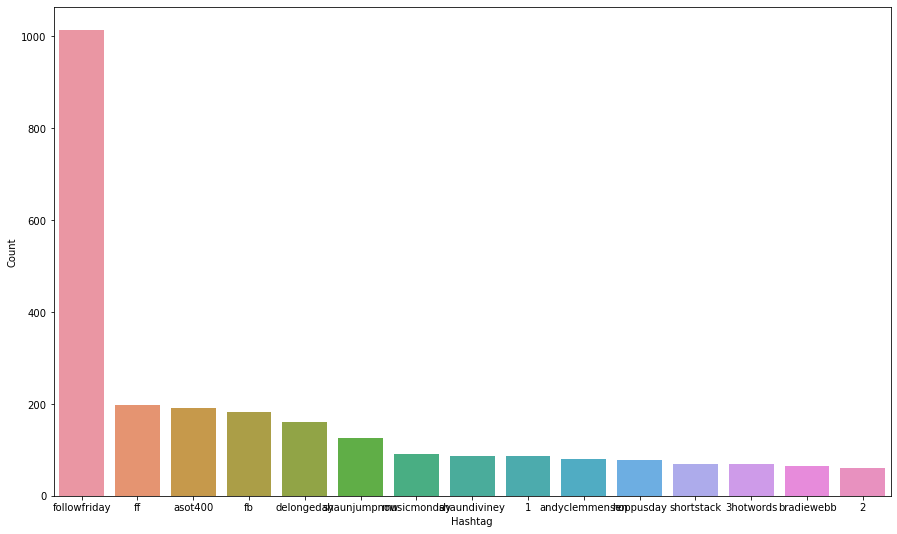

In [33]:
d = d.nlargest(columns='Count', n=15)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [34]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,itm,2
1,therapyfail,1
2,fb,1059
3,ttsc,1
4,24,11


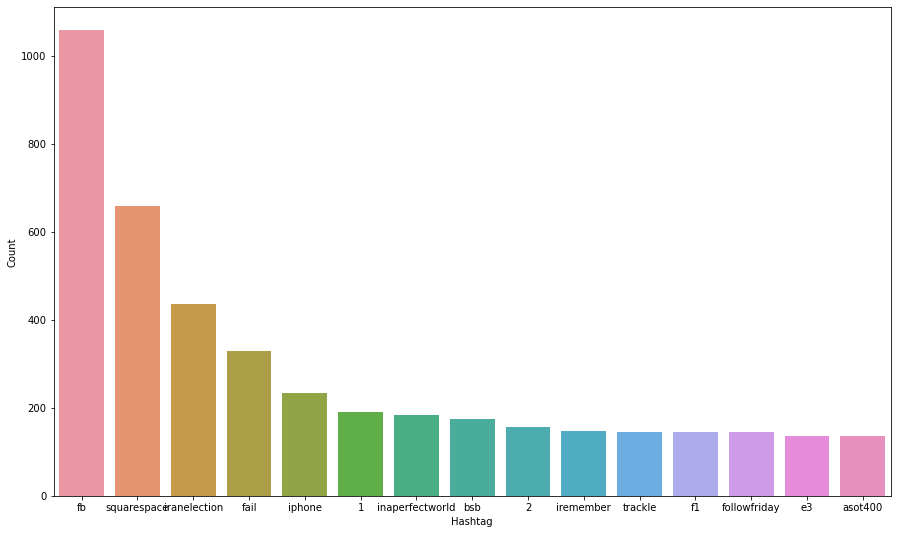

In [35]:
d = d.nlargest(columns='Count', n=15)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [40]:
#from sklearn.feature_extraction.text import CountVectorizer
#bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
#bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [41]:

#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(bow, df['sentiment'], random_state=42, test_size=0.25)

In [42]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import f1_score, accuracy_score
#model = LogisticRegression()
#model.fit(x_train, y_train)
#pred = model.predict(x_test)
#f1_score(y_test, pred)

In [43]:
#accuracy_score(y_test,pred)

# Split data as train and test

In [44]:
X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment, test_size = 0.20, random_state = 1)

# Text feature extraction using TF*IDF

In [45]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [46]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [47]:
def model_Evaluate(model):
    
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':10}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':10}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':15}, pad = 20)

              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88    159941
         1.0       0.71      0.32      0.44     49773

    accuracy                           0.81    209714
   macro avg       0.76      0.64      0.66    209714
weighted avg       0.79      0.81      0.78    209714



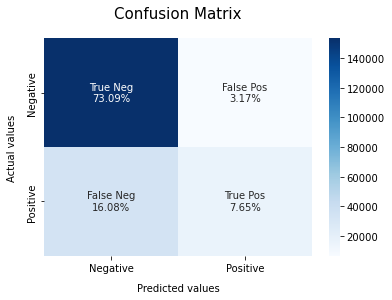

In [48]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
acc_BNB= model_Evaluate(BNBmodel)

In [62]:
file = open('vectoriser-ngram-(1,2).pickle','wb')
pickle.dump(vectoriser, file)
file.close()
file = open('Sentiment-BNB.pickle','wb')
pickle.dump(BNBmodel, file)
file.close()

In [63]:
def load_models():
    
    file = open('vectoriser-ngram-(1,2).pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()

    file = open('Sentiment-BNBv1.pickle', 'rb')
    BNBmodel = pickle.load(file)
    file.close()
    
    return vectoriser, BNBmodel

def predict(vectoriser, model, text):

    textdata = vectoriser.transform(clean_dataset(text))
    sentiment = model.predict(textdata)
    

    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
        
  
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

if __name__=="__main__":
  
    text = ['thespecialone ',
 'upset update facebook texting might cry result school today also blah ',
 'dived many time ball managed save 50 rest go bound ',
 'whole body feel itchy like fire ',
 'behaving mad see ',
 'whole crew ',
 'need hug ',
 'hey long time see yes rain bit bit lol fine thanks ',
 'nope ' ]
    
    df = predict(vectoriser, BNBmodel, text)
    print(df)   

                                                text sentiment
0                                     thespecialone   Negative
1  upset update facebook texting might cry result...  Negative
2  dived many time ball managed save 50 rest go b...  Negative
3                   whole body feel itchy like fire   Negative
4                                  behaving mad see   Negative
5                                        whole crew   Negative
6                                          need hug   Negative
7  hey long time see yes rain bit bit lol fine th...  Positive
8                                              nope   Negative
